In [780]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [781]:
# Source data was initially adjusted to remove unnecessary comments and rename column names
df = pd.read_csv('input/Dataset_spine.csv', sep=',')

# Remove, if any, empty values from the dataset
df = df.dropna()

# Map classification attribute from string to binary
df["Class_att"] = df["Class_att"].map({"Normal": 0, "Abnormal": 1})

In [782]:
# Separate data into training and validation
X = df.drop(["Class_att"], axis=1)
y = df["Class_att"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=69)

In [783]:
# MLP training
mlp = MLPClassifier(hidden_layer_sizes=(10,), activation='logistic', learning_rate='constant', solver='adam', max_iter=10000, tol=1e-4)

In [784]:
mlp.fit(X_train, y_train)

print("Training set score: {:.4f}".format(mlp.score(X_train, y_train)))
print("Test set score: {:.4f}".format(mlp.score(X_test, y_test)))

Training set score: 0.8793
Test set score: 0.7821


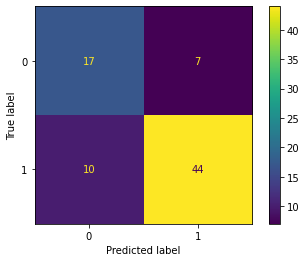

In [785]:
# Confusion matrix
y_pred = mlp.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()